In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from scipy.spatial import distance
from scipy.stats import chi2
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

Welcome to JupyROOT 6.26/06


In [2]:
folder="${fastMCKalmanOptTesting}/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
foldercheck=folder+"Covariance/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


In [3]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

treeSeed.SetAlias("c01SeedFull","seed.AliExternalTrackParam.fC[1]")

treeSeed.SetAlias("c02SeedFull","seed.AliExternalTrackParam.fC[3]")
treeSeed.SetAlias("c12SeedFull","seed.AliExternalTrackParam.fC[4]")

treeSeed.SetAlias("c03SeedFull","seed.AliExternalTrackParam.fC[6]")
treeSeed.SetAlias("c13SeedFull","seed.AliExternalTrackParam.fC[7]")
treeSeed.SetAlias("c23SeedFull","seed.AliExternalTrackParam.fC[8]")

treeSeed.SetAlias("c04SeedFull","seed.AliExternalTrackParam.fC[10]")
treeSeed.SetAlias("c14SeedFull","seed.AliExternalTrackParam.fC[11]")
treeSeed.SetAlias("c24SeedFull","seed.AliExternalTrackParam.fC[12]")
treeSeed.SetAlias("c34SeedFull","seed.AliExternalTrackParam.fC[13]")

#treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pSeed","abs((1/cos(atan(seed.AliExternalTrackParam.fP[3])))/seed.AliExternalTrackParam.fP[4])")

treeSeed.SetAlias("Res0MC","(p0Seed-p0MC)/p0MC")
treeSeed.SetAlias("Res1MC","(p1Seed-p1MC)/p1MC")
treeSeed.SetAlias("Res2MC","(p2Seed-p2MC)/p2MC")
treeSeed.SetAlias("Res3MC","(p3Seed-p3MC)/p3MC")
treeSeed.SetAlias("Res4MC","(p4Seed-p4MC)/p4MC")
treeSeed.SetAlias("RespMC","(pSeed-pMC)/pMC")

treeSeed.SetAlias("Unit0MC","(p0Seed-p0MC)/c00Seed")
treeSeed.SetAlias("Unit1MC","(p1Seed-p1MC)/c11Seed")
treeSeed.SetAlias("Unit2MC","(p2Seed-p2MC)/c22Seed")
treeSeed.SetAlias("Unit3MC","(p3Seed-p3MC)/c33Seed")
treeSeed.SetAlias("Unit4MC","(p4Seed-p4MC)/c44Seed")




True

# Testing the M distances between the parameters

## First the whole matrix

In [4]:
hDistance   = ROOT.TH1D( 'hDistance', 'Distance', 200, 0,25 )


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    #treeSeed.Print()
    for i in range(15): 
        C.append(treeSeed.seed.GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(treeSeed.input.GetParameter()[i]) 
        xSeed.append(treeSeed.seed.GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])

    
    #print(S)
    Sinv = np.linalg.inv(S)

    c = distance.mahalanobis(xMC,xSeed,Sinv)
    hDistance.Fill(c*c)
 
    

 FCN=304.157 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=3.82935e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.88469e+00   2.03762e-02   1.73755e-04  -2.59488e-02
   2  p1           1.20879e+03   1.22963e+01   1.04883e-01   5.68180e-05


Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance.png has been created


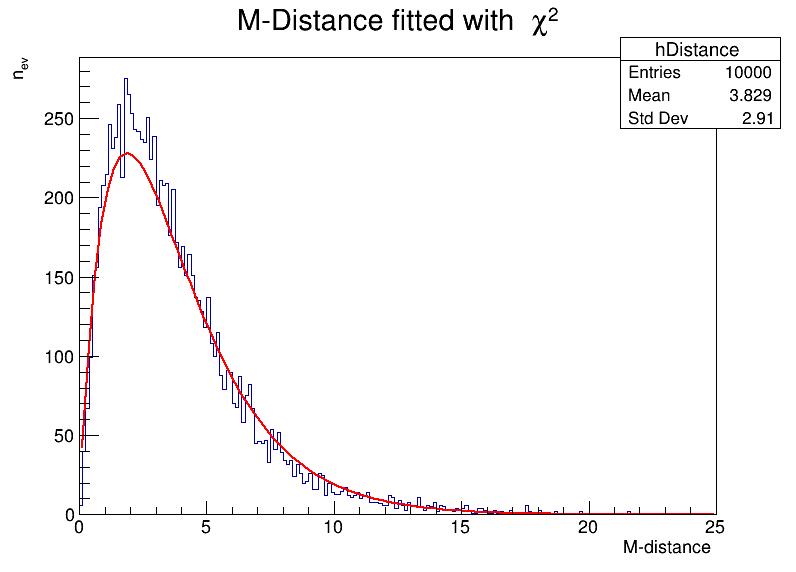

In [5]:
formula = "[1]*ROOT::Math::chisquared_pdf(x,[0])"
fchi2 = ROOT.TF1("fchi2",formula,0,25)
fchi2.SetParameters(5,10000)
  
hd = ROOT.TCanvas("hd","hd",800,600)
hDistance.SetTitle("M-Distance fitted with #chi^{2};M-distance;n_{ev}")
#fchi2.Draw()
hDistance.Draw()
hDistance.Fit("fchi2")

hd.Draw()
save=foldercheck+"MDistance"+".png"
hd.Print(save)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/QQplot.png has been created


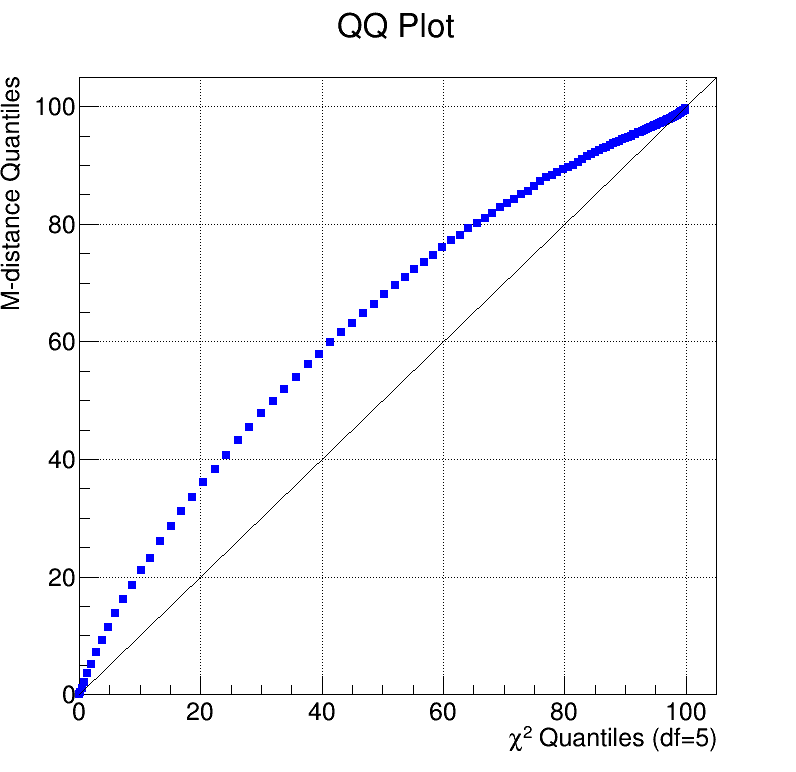

In [6]:
M_distance = array('d')
chi2_quant = array('d')

for b in range (1,hDistance.GetNbinsX()+1):
    edge = hDistance.GetBinLowEdge(b+1)
    quant = chi2.cdf(edge, 5) * 100
    integ = hDistance.Integral(1,b) / hDistance.GetEntries() * 100
    chi2_quant.append(quant)
    M_distance.append(integ)

QQ_graph = ROOT.TGraph(len(chi2_quant),chi2_quant,M_distance)

hq = ROOT.TCanvas("hq","hq",800,800)
hq.SetGrid()
QQ_graph.SetTitle("QQ Plot;#chi^{2} Quantiles (df=5);M-distance Quantiles")
QQ_graph.SetMarkerColor(4)
QQ_graph.SetMarkerSize(1)
QQ_graph.SetMarkerStyle(21)
QQ_graph.GetXaxis().SetLimits(0.,105.)                 # along X
QQ_graph.GetHistogram().SetMaximum(105.)   # along          
QQ_graph.GetHistogram().SetMinimum(0.)  #   Y
#fchi2.Draw()
l = ROOT.TLine(0.0,0.0,105,105)

QQ_graph.Draw("AP")
l.Draw("same")


hq.Draw()
save=foldercheck+"QQplot"+".png"
hq.Print(save)


## Now pair by pair

 FCN=100.206 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=6.96587e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.96583e+00   1.64955e-02   8.09456e-05   6.63733e-02
   2  p1           1.23987e+03   1.24634e+01   6.12107e-02  -3.38108e-05
 FCN=380.984 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=7.11676e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.45359e+00   1.30110e-02   1.23654e-04   8.57002e-04
   2  p1           1.22949e+03   1.25877e+01   1.19633e-01   4.26705e-07
 FCN=302.417 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=4.70

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_01.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_02.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_12.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_03.png has been created
Info in <TCanvas::Print>: png fi

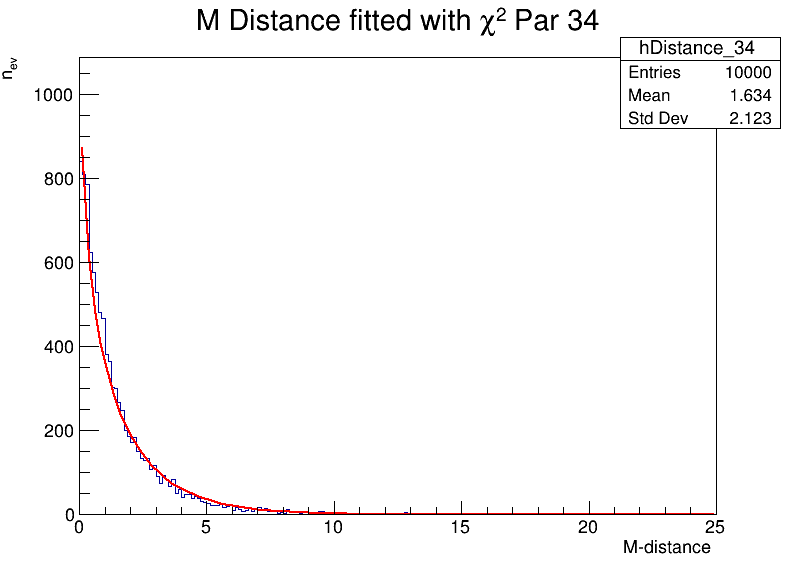

In [7]:
harray = []

for xx in range (5):
    for yy in range (xx):
        name = 'hDistance_'+str(yy)+str(xx)
        hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
        harray.append(hDistance)



for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(treeSeed.seed.GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(treeSeed.input.GetParameter()[i]) 
        xSeed.append(treeSeed.seed.GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
        for yy in range (xx):
            #print(yy,xx)
            S2 = np.array([[S[yy][yy],S[yy][xx]],
                           [S[xx][yy],S[xx][xx]]])
            #print(S2)

            xMC2 = [xMC[yy],xMC[xx]] 

            #print(xMC2)

            xSeed2 = [xSeed[yy],xSeed[xx]]

            #print(xSeed2)

            Sinv2 = np.linalg.inv(S2)

            c = distance.mahalanobis(xMC2,xSeed2,Sinv2)
            #print(harray[arraycounter])
            harray[arraycounter].Fill(c*c)
            arraycounter+=1

arraycounter = 0
for xx in range (5):
    for yy in range (xx):
        #print(harray[arraycounter])
        fname="fchi2_"+str(yy)+str(xx)
        fchi2_2 = ROOT.TF1(fname,formula,0,15)
        fchi2_2.SetParameters(5,10000)

        Canvas = "c_"+str(yy)+str(xx)
        cM = ROOT.TCanvas(Canvas,Canvas,800,600)
        Title = "M Distance fitted with #chi^{2} Par "+str(yy)+str(xx)+";M-distance;n_{ev}"
        harray[arraycounter].SetTitle(Title)
        harray[arraycounter].Draw()
        harray[arraycounter].Fit(fchi2_2)
        cM.Draw()
        save=foldercheck+"MDistance_"+str(yy)+str(xx)+".png"
        cM.Print(save)
        arraycounter+=1    
   

## Now just excluding one

 FCN=440.195 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=1.23485e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.95835e+00   1.66990e-02   1.71265e-04   8.82805e-04
   2  p1           1.19113e+03   1.21991e+01   1.25116e-01   3.88619e-06
 FCN=468.349 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=1.38564e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.96596e+00   1.65856e-02   1.75455e-04  -1.44530e-04
   2  p1           1.18722e+03   1.21803e+01   1.28846e-01  -4.31678e-06
 FCN=185.443 FROM MIGRAD    STATUS=CONVERGED      45 CALLS          46 TOTAL
                     EDM=8.35

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Covariance/MDistance_no3.png has been created
Info in <TCanvas::Print>: pn

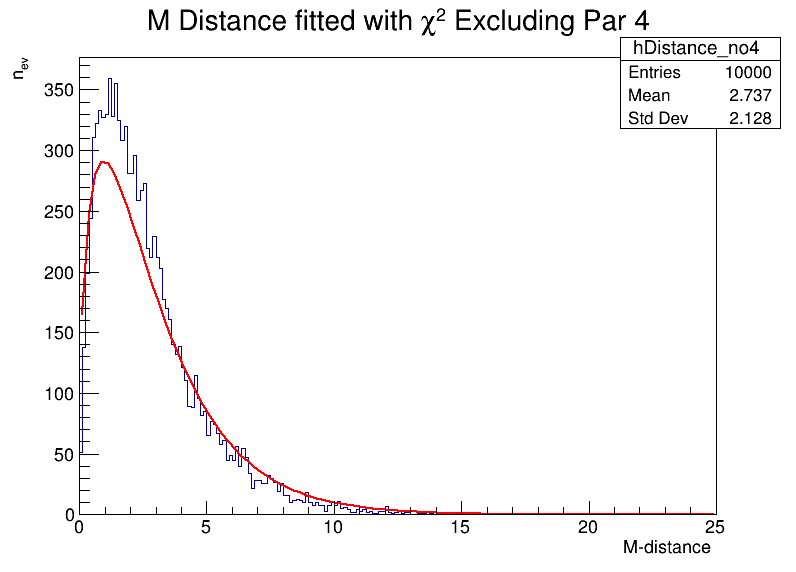

In [8]:
harray = []

for xx in range (5):
    name = 'hDistance_no'+str(xx)
    #print(name)
    hDistance   = ROOT.TH1D( name, name, 200, 0,25 )
    harray.append(hDistance)

        
for iev in range(treeSeed.GetEntries()):
    treeSeed.GetEntry(iev)
    #size = treeSeed.seed.AliExternalTrackParam.size() 
    #if(size==0): continue
    C=[]
    xMC=[]
    xSeed=[]

    
    #treeSeed.Print()
    for i in range(15): 
        C.append(treeSeed.seed.GetCovariance()[i]) 

    for i in range(5): 
        xMC.append(treeSeed.input.GetParameter()[i]) 
        xSeed.append(treeSeed.seed.GetParameter()[i]) 

    S = np.array([[C[0], C[1], C[3], C[6], C[10]],
                  [C[1], C[2], C[4], C[7], C[11]],
                  [C[3], C[4], C[5], C[8], C[12]],
                  [C[6] ,C[7], C[8], C[9], C[13]],
                  [C[10],C[11],C[12],C[13],C[14]]])
    
    #print(xMC)
    #print(xSeed)
    #print(S)

    arraycounter = 0

    for xx in range (5):
    
        #print(xx)
        S4 = []
        xMC4 = []
        xSeed4 = []

        for ii in range (5):
            row = []
            for jj in range (5):
                if(ii!=xx and jj!=xx): 
                    row.append(S[ii][jj])

            if(len(row)!=0): 
                S4.append(row)

            if(ii!=xx):
                xMC4.append(xMC[ii])
                xSeed4.append(xSeed[ii])

        #print(xMC4)
        #print(xSeed4)
        #print(S4)
        
        S4inv =  np.linalg.inv(S4)       
        
        c = distance.mahalanobis(xMC4,xSeed4,S4inv)
        harray[xx].Fill(c*c)
        
for k in range (5):
    fname="fchi2_"+str(k)
    fchi2_4 = ROOT.TF1(fname,formula,0,15)
    fchi2_4.SetParameters(4,1000)

    Canvas = "c_"+str(k)
    cM = ROOT.TCanvas(Canvas,Canvas,800,600)
    Title = "M Distance fitted with #chi^{2} Excluding Par "+str(k)+";M-distance;n_{ev}"
    harray[k].SetTitle(Title)
    harray[k].Draw()
    harray[k].Fit(fchi2_4)
    cM.Draw()
    save=foldercheck+"MDistance_no"+str(k)+".png"
    cM.Print(save)
   


# Diagonal elements unit test

 FCN=76.578 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.17241e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.23466e+02   4.01125e+00   1.39648e-02   1.23554e-04
   2  Mean        -5.56990e-03   9.88266e-03   4.24865e-05  -2.63122e-02
   3  Sigma        9.79848e-01   7.19587e-03   8.50682e-06   1.52903e-01
 FCN=68.528 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.54751e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.15702e+02   3.88347e+00   1.28979e-02  -2.09057e-06
   2  Mean        -7.91394e-03   1.01248e-02   4.11960e-05   4.13331e-04
   3  Sigma        1.00462e+00   7.

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p0.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p1.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCVSGarliteFull/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Unit_p3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwor

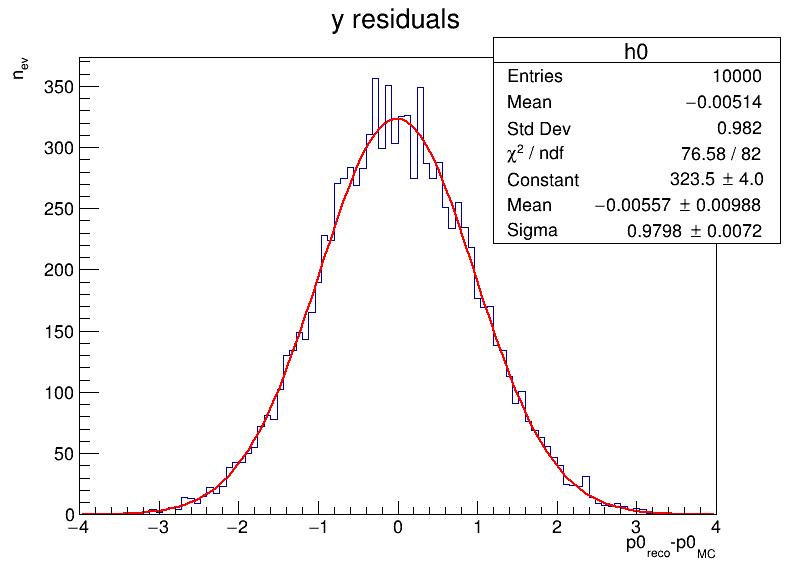

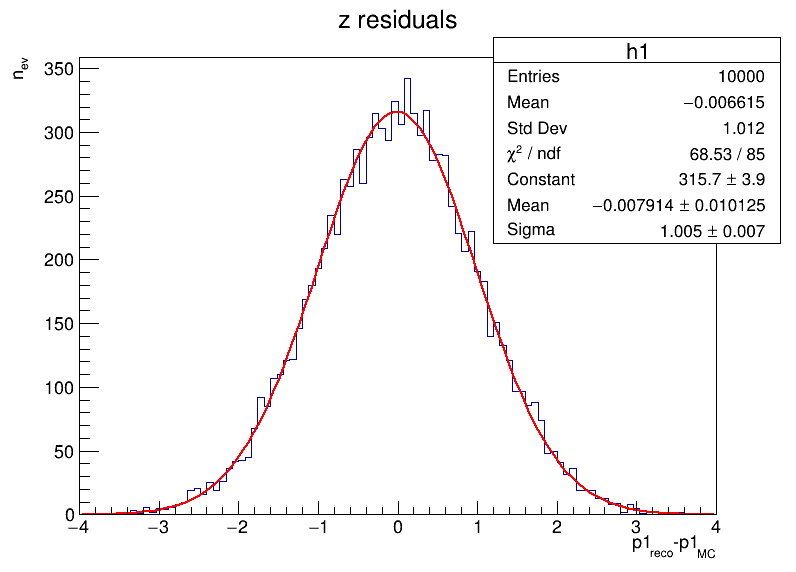

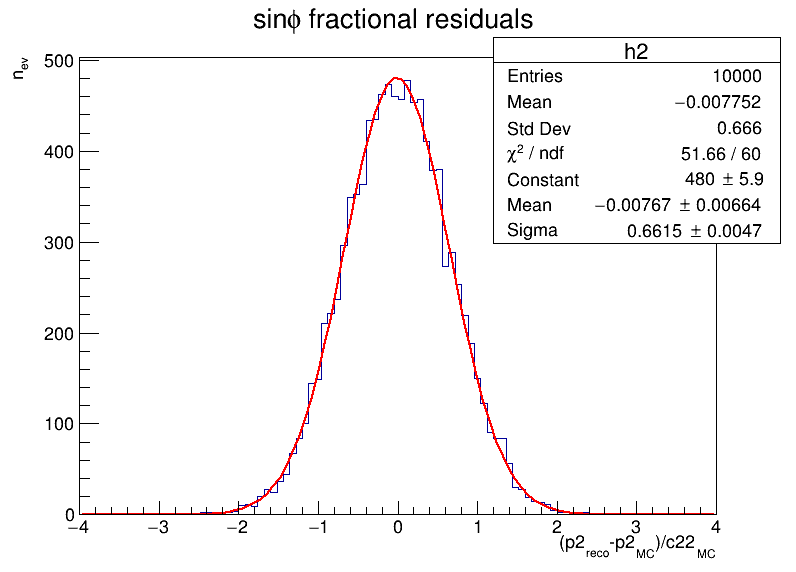

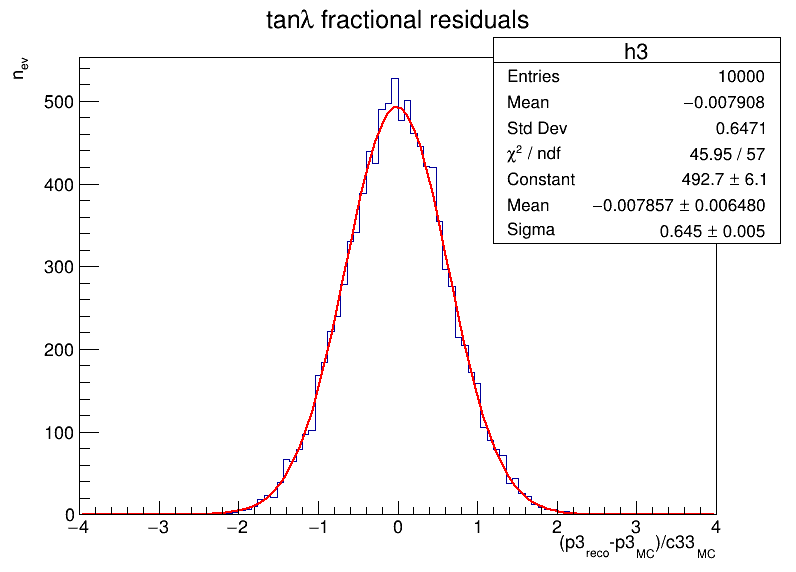

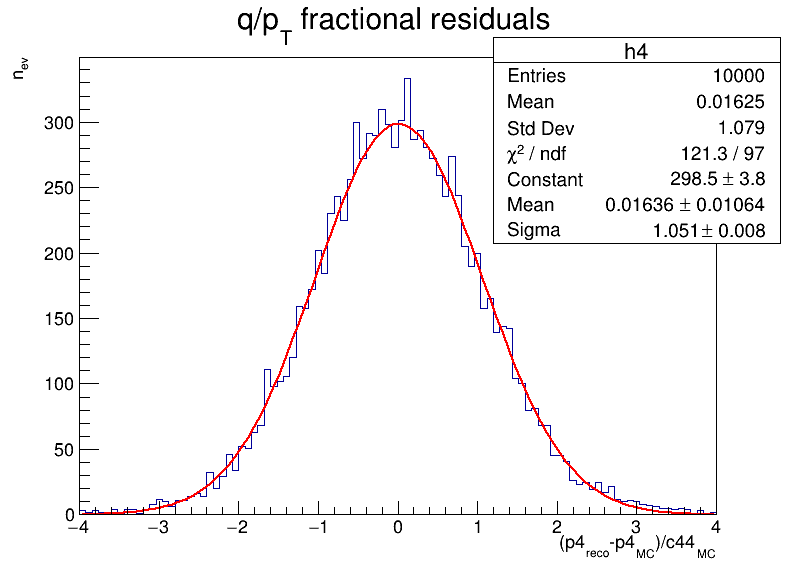

In [9]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
treeSeed.Draw("Unit0MC>>h0(100,-4,4)")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"Unit_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
treeSeed.Draw("Unit1MC>>h1(100,-4,4)")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"Unit_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"Unit_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
treeSeed.Draw("Unit3MC>>h3(100,-4,4)")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"Unit_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
treeSeed.Draw("Unit4MC>>h4(100,-4,4)")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"Unit_p4"+".png"
ch4.Print(save)